### Additional Lab work - Your turn!

* Prasanna Joshi
* Rakesh Babu

##### Data source,
- https://www.eia.gov/totalenergy/data/browser/index.php?tbl=T09.01#/?f=A&start=1949&end=2016&charted=0-6
- ../data/data2.csv

### Task on hand,
- Data: Crude oil prices
- Load data
- Clean data
- Visualize data
- Fit data
- Prediction

### Time ~ 15 minutes

### Set up environment
First, make sure that you import the libraries you'll need. In this case, you will want NumPy, Pandas, MatPlotLib.PyPlot, and sklearn.linear_model.LinearRegression. It's easiest to just copy the import statements from the regression1 notebook.

In [1]:
# Put your code to import the libraries here.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

Next, you'll want to import the csv file using pandas. You should assign the file "../data/data2.csv" to a variable called oilData.

In [2]:
# Put your code to load the data from our csv file here.
oilData = pd.read_csv("../data/data2.csv")

In [3]:
# This is some data cleaning which we haven't gone over.
# You can ignore this for now, we'll revisit it in a future session.

# Convert the Value field to a numeric.
oilData[['Value']] = oilData[['Value']].apply(pd.to_numeric, errors="coerce")

# Cast the YYYYMM field to a date-time.
oilData['YYYYMM'] = pd.to_datetime(oilData['YYYYMM'], format='%Y%m', errors='coerce')

# Get rid of rows missing data. Most of the stuff we'll do from now on REALLY doesn't like having missing data
oilData2 = oilData.dropna()

# Print out a nice summary of the columns
oilData2.describe(include = "all")


,MSN,YYYYMM,Value,Column_Order,Description,Unit
count,3141,3141,3141.000000,3141.000000,3141,3141
unique,6,526,NaN,NaN,6,1
top,COIMUUS,1975-04-01 00:00:00,NaN,NaN,Free on Board Cost of Crude Oil Imports,Dollars per Barrel
freq,525,6,NaN,NaN,525,3141
first,NaN,1973-10-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,2017-07-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,35.037755,3.499522,NaN,NaN
std,NaN,NaN,27.778206,1.707164,NaN,NaN
min,NaN,NaN,4.240000,1.000000,NaN,NaN
25%,NaN,NaN,15.860000,2.000000,NaN,NaN


### Visually Explore the Data
Now that we have the data, we'd like to see what it looks like, to make sure that a linear regression is a good idea. To do this, we'll plot YYYYMM as the x axis, and Value as the y axis.

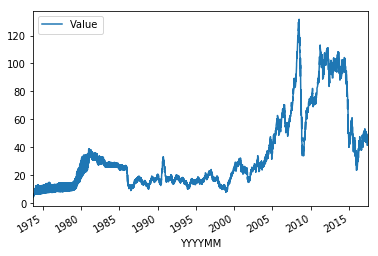

In [4]:
# This is a way to plot data directly from the data frame without having to transform anything.
# We'll learn more about it later.

oilData2.plot(x='YYYYMM', y='Value')
plt.show()

### Create the linear regression
You can copy the example from the regression1 notebook and adapt it to work with our data here. Once again, X should be YYYYMM and y axis should be Value.

Don't forget to change the column indexes when you assign values to X and y!

In [5]:
# Put your code to define X and y here.
X = oilData2.iloc[:,1]
print(X.shape)
X = X.values.reshape(-1,1)
print(X.shape)
y = oilData2.iloc[:,2]
print(y.shape)

(3141,)
(3141, 1)
(3141,)


In [6]:
# You'll run into a little bit of trouble when trying to plot the data directly.
# The code in this cell converts the datetimes into a numeric so we can run the linear regression.
# This isn't strictly the correct thing to do, but it's quick and easy.
# We'll learn the "right" way to do this in another session.

X2 = np.zeros(X.shape)
for i in range(0,X.shape[0]):
    X2[i, 0] = X[i,0] - X[0,0]

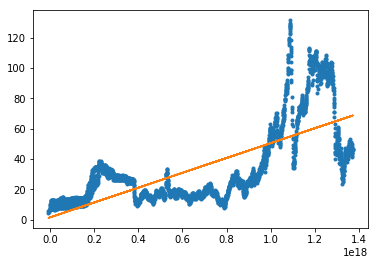

In [7]:
# Put your linear regression training and plotting code here

oilLR = LinearRegression()
oilLR.fit(X2,y)
y2 = oilLR.predict(X2)

plt.plot(X2, y, '.')
plt.plot(X2, y2, '-')

plt.show()